In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,auc,precision_score,roc_curve,roc_auc_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
%matplotlib inline

In [257]:
# import sys
# !{sys.executable} -m pip install xgboost

In [258]:
import lightgbm as lgb

In [259]:
from xgboost import XGBClassifier

FileNotFoundError: File b'Churn_Modelling.csv' does not exist

In [260]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [261]:
df['Show'] = df['No-show'].apply(lambda x: 1 if x =="No" else 0)

In [262]:
#df['No-show']= df['No-show'].apply(lambda x: 0 if x =="No" else 1)
df['Gender']= df['Gender'].apply(lambda x: 1 if x =="M" else 0)

In [263]:
df['Show'].value_counts()

1    88208
0    22319
Name: Show, dtype: int64

In [940]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [941]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [264]:
df.rename(columns={'Hipertension':'Hypertension',
                  'Handcap': 'Handicap'},inplace=True)

In [265]:
df['AppointmentDay']= df['AppointmentDay'].apply(np.datetime64)
df['ScheduledDay']= df['ScheduledDay'].apply(np.datetime64)

In [272]:
df['Month'] = df['AppointmentDay'].apply(lambda x: x.month).astype('category')
df['DayOfMonth'] = df['AppointmentDay'].apply(lambda x: x.day)
df['DayOfWeek'] = df['ScheduledDay'].apply(lambda x: x.dayofweek).astype('category')
df['HourCalled'] = df['ScheduledDay'].apply(lambda x: x.hour)
df['DaysInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay']).apply(lambda x: x.days + x.seconds / (3600*24))


In [273]:
# lets drop AppointmentDay and ScheduledDay as they are of no use
df['DaysInAdvance'].unique()

array([-0.77648148, -0.67253472, -0.67990741, ..., 40.33064815,
       40.3684838 , 40.43685185])

In [274]:
#df.drop(['AppointmentDay','ScheduledDay'],axis=1,inplace=True)
df['Neighbourhood'].astype('category')
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [275]:
# PatientId and AppointmentID columns are not that useful lets drop them
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.drop('No-show',axis=1,inplace=True)
df.drop(['AppointmentDay','ScheduledDay'],axis=1,inplace=True)

In [276]:
df.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hypertension     0
Diabetes         0
Alcoholism       0
Handicap         0
SMS_received     0
Show             0
Month            0
DayOfMonth       0
DayOfWeek        0
HourCalled       0
DaysInAdvance    0
dtype: int64

In [548]:
df['PatientId'].head()

0    2.987250e+13
1    5.589978e+14
2    4.262962e+12
3    8.679512e+11
4    8.841186e+12
Name: PatientId, dtype: float64

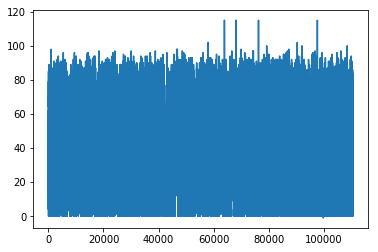

In [549]:
plt.plot(df['Age'])

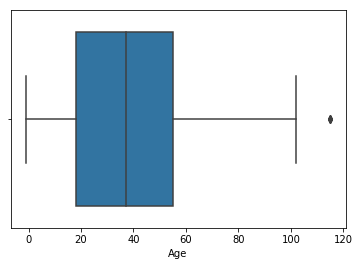

In [550]:
sns.boxplot(x='Age',data=df)

In [551]:
#df['No-show'].unique()

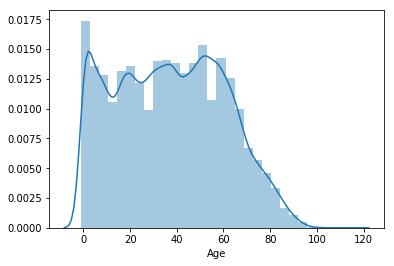

In [552]:
sns.distplot(df['Age'],bins=30)

In [553]:
type(df.columns)

pandas.core.indexes.base.Index

In [554]:
# sns.jointplot(y='Age',x='No-show',data=df)
# #sns.countplot(x='No-sho')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [278]:
df['AppointmentDay']= df['AppointmentDay'].apply(np.datetime64)

KeyError: 'AppointmentDay'

In [745]:
df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)

In [557]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [558]:
df['Age'].mean()

37.08887421173107

In [281]:
df.loc[(df['Age'] < 0) | (df['Age'] > 100),['Age']] = 37

In [282]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 100,  99], dtype=int64)

Who visits the doctor more often?

In [564]:
# df = df[df['No-show'] == 'Yes']
# range_df = pd.DataFrame()
# range_df['Age'] =range(100)
# men = range_df['Age'].apply(lambda x: len(df[df['Age'] == x]) & (df['Gender'] == 'M'))
# women = range_df['Age'].apply(lambda x: len(df[df['Age'] == x]) & (df['Gender'] == 'F'))
# plt.plot(range(100),men, 'b')
# plt.plot(range(100),women, color = 'r')

# As we can see Women visit the doctor more often

Text(0.5,1,'Women visit the doctor more often')

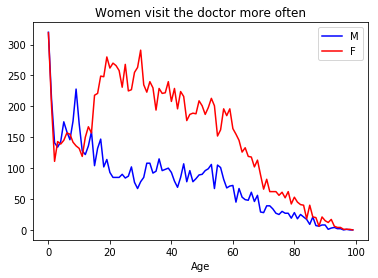

In [590]:
df = df[df['No-show'] == 1]
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1)]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0)]))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.title('Women visit the doctor more often')

Text(0.5,0,'Age')

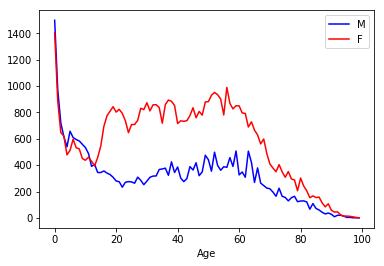

In [598]:
df = df[df['No-show'] == 0]
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1)]))
women = range_df.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0)]))
plt.plot(range(100),men, 'b')
plt.plot(range(100),women, color = 'r')
plt.legend(['M','F'])
plt.xlabel('Age')
#plt.title('Women visit the doctor more often')

In [573]:
# what is the proportion of male & female?
df['Gender'].value_counts(normalize = True)

0    0.653882
1    0.346118
Name: Gender, dtype: float64

In [599]:
# # no. of patients who miss their appointments
# len(df[df['No-show'] == 1].index)

In [601]:
# which neighbourhoods have the highest number of shows?
shows = df[df['No-show'] == 0]
shows.groupby('Neighbourhood')['No-show'].count().sort_values(ascending=False).head(20)

Neighbourhood
JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
CENTRO               2631
ITARARÉ              2591
TABUAZEIRO           2559
SANTO ANTÔNIO        2262
BONFIM               2223
JESUS DE NAZARETH    2157
SANTO ANDRÉ          2063
JABOUR               2058
CARATOÍRA            1974
SÃO PEDRO            1933
NOVA PALESTINA       1862
DA PENHA             1788
ANDORINHAS           1741
ROMÃO                1741
ILHA DO PRÍNCIPE     1734
Name: No-show, dtype: int64

In [624]:
df['AppointmentMonths'] = df['AppointmentDay'].dt.month

In [625]:
df['AppointmentMonths'].unique()

array([4, 5, 6], dtype=int64)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

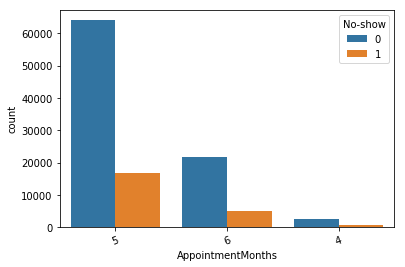

In [627]:
sns.countplot(x='AppointmentMonths', hue='No-show', data=df, order = df['AppointmentMonths'].value_counts().index)
plt.xticks(rotation=20)

Patients mostly miss their during tme month of May

In [581]:
df['No-show'].unique()

array([0, 1], dtype=int64)

In [583]:
# overall no-show percentage
# from __future__ import division
len(df[df['No-show'] == 1].index) / len(df.index)

0.20193255946510807

About 20% population miss their appointments 

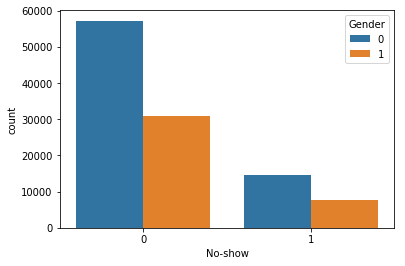

In [589]:
# visualise prcentage of no-shows
sns.countplot(x='No-show', data=df,hue='Gender')

In [587]:
# what is the patient age distribution for no-shows versus shows?
df.groupby('No-show')['Age'].mean()

No-show
0    37.790064
1    34.317667
Name: Age, dtype: float64

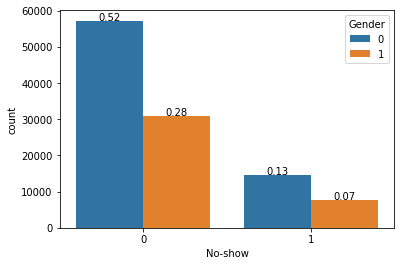

In [588]:
# what is the proportion of missing the appointment whether the patient is male or female?
x = sns.countplot(x='No-show', hue='Gender', data=df)
# to plot the values over the labels
total = float(len(df))
for p in x.patches:
    height = p.get_height()
    x.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha='center')

Women are twice as likely to visit the doctor
But this effect is true only from a certain age.

Until the age of 14, boys and girls attend the doctor similarly. Starting from around that age, however, there are more than 2.5 woman visits for every man visit.
Possible explanations:
Since the difference starts when approaching puberty, it might be due the different care that males and females seek regarding their reproductive system.
Men and women might suffer from different medical conditions that would require a different visiting frequency.
A different approach to health care
A difference in lifestyle that can allow women more visits
We don't have enough data for a conclusive statement. but let's see of any of the conditions that are detailed in the data can explain or partially explain the difference.

In [453]:
range_df.columns[0]

'Age'

In [454]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

Text(0.5,1,'Hyper Tension')

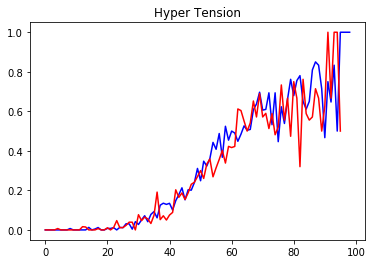

In [455]:
men_tension = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 1) & (df.Hypertension == 1)]))
women_tension = range_df[range_df.columns[0]].apply(lambda x: len(df[(df.Age == x) & (df.Gender == 0) & (df.Hypertension == 1)]))
plt.plot(range(100),men_tension/men,color='b')
plt.plot(range(100),women_tension/women,color='r')
plt.title('Hyper Tension')


In [456]:
# As we can see Hyptertension is similar to both men and women

In [457]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [458]:
men_diabetes = range_df['Age'].apply(lambda x: len(df[(df['Age'] == x) & (df['Diabetes'] == 1) & (df['Gender'] == 1)]))
women_diabete = range_df['Age'].apply(lambda x: len(df[(df['Age'] == x ) & (df['Diabetes'] == 1) & (df['Gender'] == 0)]))

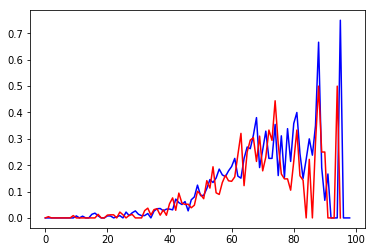

In [459]:
plt.plot(range(100), men_diabetes/men,'b')
plt.plot(range(100), women_diabete/women, 'r')

In [734]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Show'],
      dtype='object')

 One exception to the above statement is diabetes for people who are more than 80 years old. 
    in which case this condition is more common in women.

In [461]:
men_alcoholism = range_df['Age'].apply(lambda x: len(df[(df['Age'] == x) & (df['Alcoholism'] == 1) & (df['Gender'] == 1)]))
women_alcoholism = range_df['Age'].apply(lambda x: len(df[(df['Age'] == x ) & (df['Alcoholism'] == 1) & (df['Gender'] == 0)]))

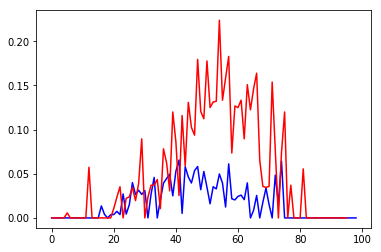

In [462]:
plt.plot(range(100), men_alcoholism/men,'b')
plt.plot(range(100), women_alcoholism/women, 'r')

As we can see alcohol consumption is more among men than women and 
especially between the age of 40 and 75

Both hypertension and diabetes are about as common in women and men along most of their lives, and smoking is the only condition in our data which is significantly more common among on the of sexes - men.
but while we cannot use these conditions to explain the gender difference in doctors visit, it is of course important to make clear that there is such an abundance of conditions and reasons to visit the doctor, that it is simply impossible to use only 4 of them for this analysis.

# Is there any differnce in planning? 

In [750]:
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['Awaiting_time'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

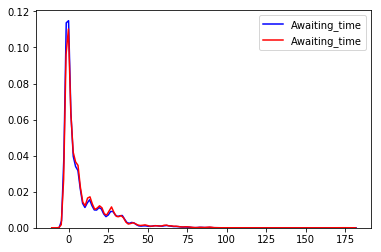

In [519]:
sns.kdeplot(df[df['Gender'] == 1]['Awaiting_time'],color= 'b')
sns.kdeplot(df[df['Gender'] == 0]['Awaiting_time'],color = 'r')

# Do men and women visit the doctor at the same days?

In [520]:
df['DayofTheWeek']=df.AppointmentDay.dt.weekday_name

In [521]:
df['No-show'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: No-show, dtype: int64

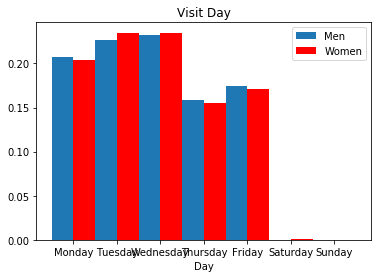

In [522]:
Days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Days_df =  pd.DataFrame(Days)

men_days = Days_df[Days_df.columns[0]].apply(lambda x: len(df[(df.DayofTheWeek == x) & (df.Gender == 1)]))
women_days = Days_df[Days_df.columns[0]].apply(lambda x: len(df[(df.DayofTheWeek == x) & (df.Gender == 0)]))

plt.bar(range(7), men_days/len(df[df.Gender == 1]), width = 0.5)
plt.bar(range(7)+0.5*np.ones(len(range(7))), women_days/len(df[df.Gender == 0]), width = 0.5, color = 'r')
plt.xticks(range(7) + 0.25*np.ones(len(range(7))),Days)

plt.title('Visit Day')
plt.xlabel('Day')
plt.legend(['Men','Women'])

In [523]:
# First let's check out the Day of the Week that has the largest No-Shows
# figure = plt.figure(figsize=(18,8))
# ax = figure.add_subplot(1,2,1)
#ax.set_title("Weekly No Show Count")
sns.countplot(x="DayofTheWeek",hue="No-show",data=df,palette='winter',ax=ax)
#ax.set_xlabel("Weekday (starts from Monday)")

# ax2 = figure.add_subplot(1,2,2)
# ax2.set_title("Monthly No Show Count")
# sns.countplot(x="Month Number",hue="No-show",data=df,palette='winter',ax=ax2)
# ax2.set_xlabel("Month (starts from January)")

# plt.tight_layout
# plt.show()

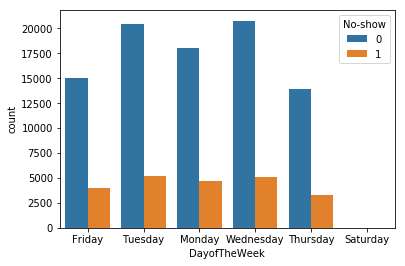

In [524]:
sns.countplot(x='DayofTheWeek',hue='No-show',data=df)

In [516]:
df['No-show'].unique()

array([0, 1], dtype=int64)

In [647]:
# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# for index, weekday in enumerate(weekdays):
#     k = df[df.DayofTheWeek==weekday]['No-show']
#     percent_m = 1-sum(k)/len(k)
#     plt.bar(index, percent_m, color='blue')
    
# plt.xticks(range(len(weekdays)),weekdays, rotation=50)
# plt.title('Percent of No-Show per DayOfWeek')
# plt.show()

In [636]:
# # how likely patients comes to their scheduled appointment if they have received a sms
# sns.catplot('SMS_received', hue='No-show', data=df, kind='count')
# #sns.FacetGrid('SMS_received', hue='No-show', data=df, kind='count')

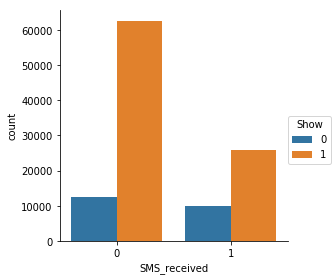

In [973]:
sns.factorplot('SMS_received', hue='Show', data=df, kind='count')

# Lets Start Predicting

In [283]:
df.columns
# df['Show'].unique()

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Show', 'Month',
       'DayOfMonth', 'DayOfWeek', 'HourCalled', 'DaysInAdvance'],
      dtype='object')

In [284]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Neighbourhood','Show'],axis=1), 
                                                    df['Show'], test_size=0.30, 
                                                    random_state=101)

In [285]:
X_train.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'Month', 'DayOfMonth',
       'DayOfWeek', 'HourCalled', 'DaysInAdvance'],
      dtype='object')

In [286]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Month,DayOfMonth,DayOfWeek,HourCalled,DaysInAdvance
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,29,4,18,-0.776481
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,29,4,16,-0.672535
2,0,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,29,4,16,-0.679907
3,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,29,4,17,-0.728831
4,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,29,4,16,-0.671794


In [57]:
# Lets try to balance the target variable using SMOTE

In [287]:
smt = SMOTE(ratio='minority')
X_train_res, y_train_res = smt.fit_sample(X_train, y_train)

In [288]:
lr = LogisticRegression()

In [289]:
lr.fit(X_train_res,y_train_res)
pred=lr.predict(X_test)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [290]:
accuracy_score(y_test,pred)

0.6622033233812841

In [291]:
confusion_matrix(y_test,pred)

array([[ 3786,  2811],
       [ 8390, 18172]], dtype=int64)

In [297]:
recall_score(y_test,pred)
precision_score(y_test,pred)

0.8660344088071296

In [298]:
recall_score(y_test,pred)

0.6841352307808147

In [296]:
confusion_matrix(y_test,pred)

array([[ 3786,  2811],
       [ 8390, 18172]], dtype=int64)

In [294]:
roc_auc_score(y_test,pred)

0.6290162283963192

In [68]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
sel.fit(X_train_res, y_train_res)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [69]:
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [70]:
print(selected_feat)

Index(['Gender', 'Age', 'DayOfMonth', 'HourCalled', 'DaysInAdvance'], dtype='object')


In [313]:
rfc= RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=50, min_samples_leaf=100, n_jobs = -1)
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [312]:
clf = RandomForestClassifier(n_estimators=200,max_depth=100,min_samples_split=50,min_samples_leaf=100)
clf=clf.fit(X_train_res, y_train_res)
feat=(clf.feature_importances_)
pred=clf.predict(X_test)


In [314]:
pred =rfc.predict(X_test)

In [315]:
accuracy_score(y_test,pred)

0.7544859615790585

In [316]:
precision_score(y_test,pred)

0.8366779983185291

In [317]:
roc_auc_score(y_test,pred)

0.5922210998085631

In [304]:
f1_score(y_test,pred)

0.8503581409983527

In [318]:
confusion_matrix(y_test,pred)

array([[ 2129,  4468],
       [ 3673, 22889]], dtype=int64)

In [217]:
recall_score(y_test,pred)

0.8653339356976131

In [133]:
confusion_matrix(y_test,pred)

array([[  404,  6193],
       [  457, 26105]], dtype=int64)

In [319]:
gb= GradientBoostingClassifier(n_estimators=100,max_depth=10,min_samples_split=4,learning_rate=0.05)

In [320]:
gb.fit(X_train_res,y_train_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [321]:
pred= gb.predict(X_test)

In [322]:
accuracy_score(y_test,pred)

0.7954099942700322

In [323]:
precision_score(y_test,pred)

0.8154184741005358

In [324]:
recall_score(y_test,pred)

0.9624651758150742

In [209]:
f1_score(y_test,pred)

0.882534642530501

In [342]:
roc_auc_score(y_test,pred)

0.5426241295173597

# Final Model is LightGBM

In [330]:
lgb_train = lgb.Dataset(X_train_res, y_train_res)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['binary_error', 'auc'],
    'learning_rate': 0.05,
    'verbose': 0,
    'num_boost_round': 1000,
    'num_leaves': 512,
    'max_depth': 256,
    'seed': 1
    # 'bagging_fraction': 0.8,
    # 'bagging_freq': 5,
}

gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)

C:\Users\krishna\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_error: 0.228837	valid_0's auc: 0.710031
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_error: 0.222835	valid_0's auc: 0.712957
[3]	valid_0's binary_error: 0.2257	valid_0's auc: 0.713311
[4]	valid_0's binary_error: 0.221237	valid_0's auc: 0.714765
[5]	valid_0's binary_error: 0.219247	valid_0's auc: 0.71516
[6]	valid_0's binary_error: 0.219458	valid_0's auc: 0.71557
[7]	valid_0's binary_error: 0.217166	valid_0's auc: 0.717749
[8]	valid_0's binary_error: 0.217136	valid_0's auc: 0.718269
[9]	valid_0's binary_error: 0.215507	valid_0's auc: 0.718976
[10]	valid_0's binary_error: 0.215899	valid_0's auc: 0.718666
[11]	valid_0's binary_error: 0.215055	valid_0's auc: 0.719702
[12]	valid_0's binary_error: 0.215658	valid_0's auc: 0.720223
[13]	valid_0's binary_error: 0.214753	valid_0's auc: 0.720393
[14]	valid_0's binary_error: 0.214723	valid_0's auc: 0.720785
[15]	valid_0's binary_error: 0.213818	valid_0's auc: 0.720924
[16]	valid_0's binary

[137]	valid_0's binary_error: 0.205555	valid_0's auc: 0.732062
[138]	valid_0's binary_error: 0.205646	valid_0's auc: 0.732085
[139]	valid_0's binary_error: 0.205706	valid_0's auc: 0.732144
Early stopping, best iteration is:
[89]	valid_0's binary_error: 0.20462	valid_0's auc: 0.730171


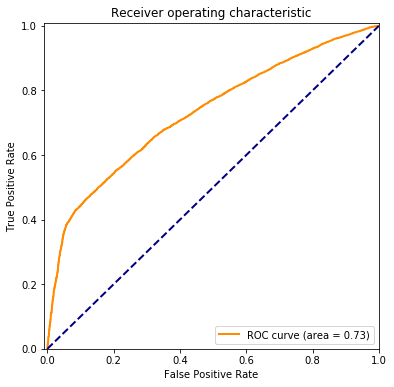

In [332]:
y_pred = gbm.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [334]:
auc(fpr, tpr)

0.7301713682776064

In [336]:
roc_auc_score(y_test,y_pred)

0.7301713682776064

In [337]:
accuracy_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

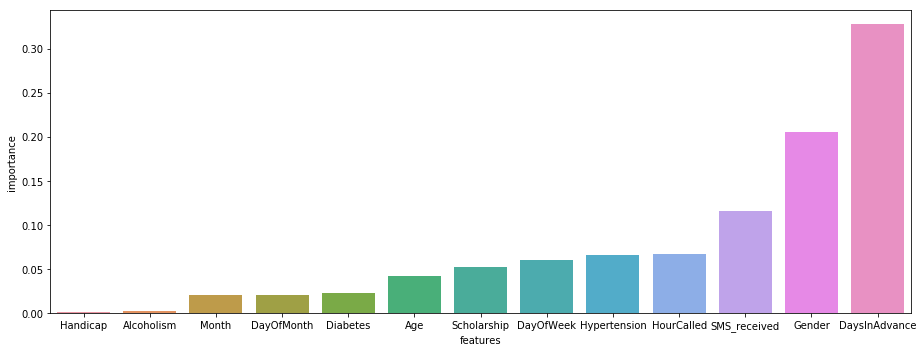

In [328]:
plt.figure(figsize=(13,5))
imp = pd.DataFrame()
imp['features'] = X_train.columns
imp['importance'] = rfc.feature_importances_
imp = imp.sort_values(by='importance')
sns.barplot(x='features',y='importance',data=imp)
plt.tight_layout()

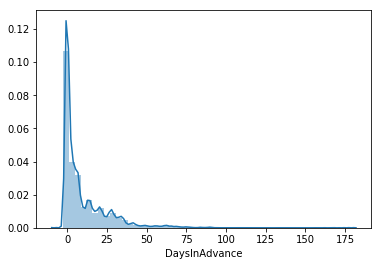

In [73]:
#sns.jointplot(x=df['Show'],y='DaysInAdvance',data=df)
#df.corr()
#sns.countplot(x='DaysInAdvance',hue='Show',data=df)
sns.distplot(df['DaysInAdvance'])

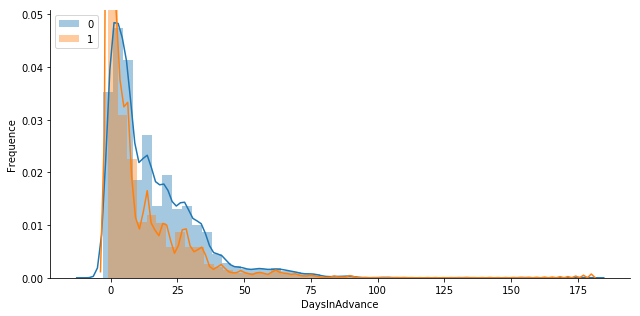

In [24]:
ax = sns.FacetGrid(df, hue="Show", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "DaysInAdvance")
ax.set_ylabels("Frequence")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

array([[ 0.        , 44.        ,  0.        , ...,  2.        ,
        10.        , -0.45152778],
       [ 0.        , 68.        ,  0.        , ...,  4.        ,
         7.        ,  4.68708333],
       [ 1.        , 45.        ,  0.        , ...,  0.        ,
        18.        , -0.76436343],
       ...,
       [ 1.        , 35.        ,  0.        , ...,  2.20331063,
        15.79668937,  7.11584406],
       [ 1.        , 31.91937548,  0.        , ...,  2.        ,
        12.        , 11.55759897],
       [ 0.        , 47.12981629,  0.87018371, ...,  2.        ,
         9.12981629, -0.2764697 ]])

In [763]:

# # Convert all types to float and sort by index
# #df.drop(['PatientId','AppointmentID','ScheduledDay','No-show','AppointmentDay','Awaiting_time'],inplace=True,axis=1)
# #df.head()
# #df = df.astype(float)
# df.drop('Neighbourhood',axis=1,inplace=True)

In [764]:
df.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'Show'],
      dtype='object')

In [765]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Show'],axis=1), 
                                                    df['Show'], test_size=0.30, 
                                                    random_state=101)

In [841]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.629120299164631

In [842]:
confusion_matrix(y_test,y_pred)

array([[ 3177,  3420],
       [ 8878, 17684]], dtype=int64)

In [843]:
precision_score(y_test,y_pred)

0.8379454131918119

In [844]:
recall_score(y_test,y_pred)

0.6657631202469694

In [791]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.26      0.46      0.33      6597
           1       0.83      0.67      0.74     26562

   micro avg       0.63      0.63      0.63     33159
   macro avg       0.54      0.56      0.53     33159
weighted avg       0.72      0.63      0.66     33159



In [781]:
y_train.value_counts()

1    61646
0    15722
Name: Show, dtype: int64

In [840]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [783]:
np.bincount(y_train)

array([61646, 61646], dtype=int64)

In [808]:

# features = df.columns[0:-1]
df.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'Show'],
      dtype='object')

In [802]:
features


Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received'],
      dtype='object')

In [805]:
clf = RandomForestClassifier(n_jobs=2)
feat = list(features)

In [822]:
#clf.fit(df[0:-1], df['Show'])


In [958]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Show,Month,DayOfMonth,DayOfWeek,HourCalled,DaysInAdvance
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,4,29,4,18,-0.776481
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,4,29,4,16,-0.672535
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,4,29,4,16,-0.679907
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,4,29,4,17,-0.728831
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,4,29,4,16,-0.671794


In [ ]:
insurance_train[['safty_rating','annual_income_recoded','past_num_of_claims','liab_prct_modified','claim_est_payout','age_of_vehicle','vehicle_price']] = scaler.fit_transform(insurance_train[['safty_rating','annual_income_recoded','past_num_of_claims','liab_prct_modified','claim_est_payout','age_of_vehicle','vehicle_price']])  

In [823]:

scaler = StandardScaler()
scaler.fit(df.drop('Show',axis=1))
scaled_features = scaler.transform(df.drop('Show',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[~df.columns.isin(['Show'])])
#df_feat = pd.DataFrame(scaled_features,columns=df.columns[~df.columns.isin(['fraud','Validation Stratified by fraud'])])

df_feat.head()

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,-0.733837,1.078489,-0.330112,2.017378,-0.278261,-0.177068,-0.137722,-0.687612
1,1.362701,0.818773,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
2,-0.733837,1.078489,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
3,-0.733837,-1.258949,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
4,-0.733837,0.818773,-0.330112,2.017378,3.593747,-0.177068,-0.137722,-0.687612


In [908]:
X_train, X_test, y_train, y_test = train_test_split(df_feat.drop(['Show'],axis=1), 
                                                    df_feat['Show'], test_size=0.30, 
                                                    random_state=101)

In [834]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test,y_pred)
precision_score(y_test,y_pred)
#recall_score(y_test,y_pred)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8010494888265629

In [838]:
confusion_matrix(y_test,y_pred)

array([[    0,  6597],
       [    0, 26562]], dtype=int64)

In [839]:
recall_score(y_test,y_pred)

1.0

In [827]:
df_feat['Show'] = df['Show']

In [828]:
df_feat.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,-0.733837,1.078489,-0.330112,2.017378,-0.278261,-0.177068,-0.137722,-0.687612,1
1,1.362701,0.818773,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612,1
2,-0.733837,1.078489,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612,1
3,-0.733837,-1.258949,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612,1
4,-0.733837,0.818773,-0.330112,2.017378,3.593747,-0.177068,-0.137722,-0.687612,1


In [864]:
smt = SMOTE(ratio='minority',k_neighbors=7)
X_train_res, y_train_res = smt.fit_sample(X_train, y_train)

In [865]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [866]:
y_pred = lr.predict(X_test)

In [867]:
accuracy_score(y_test, y_pred)

0.6337042733496185

In [868]:
confusion_matrix(y_test,y_pred)

array([[ 3133,  3464],
       [ 8682, 17880]], dtype=int64)

In [869]:
precision_score(y_test,y_pred)

0.8377061469265368

In [870]:
recall_score(y_test,y_pred)

0.6731420826744974

In [871]:
from sklearn.ensemble import RandomForestClassifier

In [890]:
rfc = RandomForestClassifier(n_estimators=200,random_state=5)

In [897]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [ ]:
rfc.fea

In [892]:
y_preds = rfc.predict(X_test)

In [893]:
#rfc.score(y_test, y_preds)


In [894]:
accuracy_score(y_test, y_preds)

0.6177206791519648

In [895]:
precision_score(y_test,y_preds)

0.8386829268292683

In [896]:
recall_score(y_test,y_pred)

0.6731420826744974

In [899]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_res, y_train_res)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [909]:
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

2

In [913]:
print(selected_feat)

Index(['Age', 'SMS_received'], dtype='object')


In [914]:
df_feat.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,-0.733837,1.078489,-0.330112,2.017378,-0.278261,-0.177068,-0.137722,-0.687612,1
1,1.362701,0.818773,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612,1
2,-0.733837,1.078489,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612,1
3,-0.733837,-1.258949,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612,1
4,-0.733837,0.818773,-0.330112,2.017378,3.593747,-0.177068,-0.137722,-0.687612,1


In [922]:
#dummy_df = df_feat[df_feat['Age','SMS_received']]
dummy_df= df_feat[['SMS_received','Age','Show']]

In [923]:
dummy_df.head()

,SMS_received,Age,Show
0,-0.687612,1.078489,1
1,-0.687612,0.818773,1
2,-0.687612,1.078489,1
3,-0.687612,-1.258949,1
4,-0.687612,0.818773,1


In [924]:
X_train, X_test, y_train, y_test = train_test_split(dummy_df.drop(['Show'],axis=1), 
                                                    dummy_df['Show'], test_size=0.30, 
                                                    random_state=101)

In [925]:
rfc = RandomForestClassifier(n_estimators=200,random_state=5)

In [926]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [928]:
pred =rfc.predict(X_test)

In [929]:
accuracy_score(y_test,pred)

0.8010494888265629

In [931]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6597
           1       0.80      1.00      0.89     26562

   micro avg       0.80      0.80      0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.64      0.80      0.71     33159



C:\Users\krishna\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [932]:
recall_score(y_test,pred)

1.0

In [933]:
precision_score(y_test,pred)

0.8010494888265629

In [221]:
confusion_matrix(y_test,pred)

array([[ 2061,  4536],
       [ 3577, 22985]], dtype=int64)

In [222]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Month,DayOfMonth,DayOfWeek,HourCalled,DaysInAdvance
0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,29,4,18,-0.776481
1,1,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,29,4,16,-0.672535
2,0,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,29,4,16,-0.679907
3,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,29,4,17,-0.728831
4,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,29,4,16,-0.671794


In [228]:
def load_data(df):
    df.drop('Neighbourhood',inplace=True,axis=1y_pred = gbm.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show())
    X_test = df.sample(frac=.2)
    y_test = X_test.pop('Show')
    data = df.drop(X_test.index, axis=0)

    X_train = data
    y_train = X_train.pop('Show')

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data(df)

In [229]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [230]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['binary_error', 'auc'],
    'learning_rate': 0.05,
    'verbose': 0,
    'num_boost_round': 1000,
    'num_leaves': 512,
    'max_depth': 256,
    'seed': 1
    # 'bagging_fraction': 0.8,
    # 'bagging_freq': 5,
}


In [231]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)

C:\Users\krishna\Anaconda3\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\krishna\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's binary_error: 0.200679	valid_0's auc: 0.717661
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_error: 0.200679	valid_0's auc: 0.720314
[3]	valid_0's binary_error: 0.200679	valid_0's auc: 0.721617
[4]	valid_0's binary_error: 0.200679	valid_0's auc: 0.722949
[5]	valid_0's binary_error: 0.200679	valid_0's auc: 0.724089
[6]	valid_0's binary_error: 0.200679	valid_0's auc: 0.725511
[7]	valid_0's binary_error: 0.200679	valid_0's auc: 0.72594
[8]	valid_0's binary_error: 0.200679	valid_0's auc: 0.726618
[9]	valid_0's binary_error: 0.200679	valid_0's auc: 0.728217
[10]	valid_0's binary_error: 0.200679	valid_0's auc: 0.729811
[11]	valid_0's binary_error: 0.200679	valid_0's auc: 0.730365
[12]	valid_0's binary_error: 0.200679	valid_0's auc: 0.731072
[13]	valid_0's binary_error: 0.200543	valid_0's auc: 0.731192
[14]	valid_0's binary_error: 0.200543	valid_0's auc: 0.731621
[15]	valid_0's binary_error: 0.200543	valid_0's auc: 0.731833
[16]	valid_0's bin

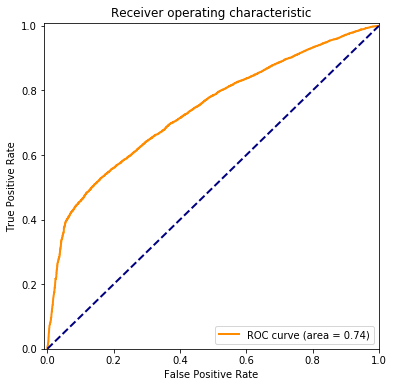

In [236]:
y_pred = gbm.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [329]:
accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [33159, 22105]

In [241]:
len(y_pred)

22105

In [240]:
type(y_pred)

numpy.ndarray

In [338]:
for i in range(0,len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i]=0

In [339]:
confusion_matrix(y_test,y_pred)

array([[  878,  5719],
       [ 1066, 25496]], dtype=int64)

In [340]:
accuracy_score(y_test,y_pred)

0.795379836545131

In [341]:
roc_auc_score(y_test,y_pred)

0.5464791393532027

In [252]:
fpr,tpr,thresh = roc_curve(y_test,y_pred)

In [253]:
roc_auc = auc(fpr, tpr)

In [255]:
roc_auc

0.516019355219651